In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Chapter 1: Using logistic regression to predict the IMDB dataset sentiment 

In [4]:
# Load the dataset and save it into a DataFrame named df
df = pd.read_csv("IMDB Dataset.csv")

# Initial exploration
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Question 1
# load the data into a DataFrame named df
# change the sentiment column to 1 for positive and 0 for negative
# Save the review column into a variable named X
# Save the sentiment column into a variable named y
# divide the data into training and testing sets using the train_test_split function
# use 80% of the data for training and 20% for testing
# use the random state 42

# def load_data_and_train_test_split(file_path, test_size=0.2, random_state=42):
#    Add your code here

#    return X_train, X_test, y_train, y_test

In [5]:
# Question 1
# load the data into a DataFrame named df
# change the sentiment column to 1 for positive and 0 for negative
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
# Save the review column into a variable named X
X = df['review']
# Save the sentiment column into a variable named y
y = df['sentiment']
# divide the data into training and testing sets using the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def load_data_and_train_test_split(file_path, test_size=0.2, random_state=42, target_column='sentiment'):


    df = pd.read_csv(file_path)
    # divide the data into training and testing sets using the train_test_split function

    df[target_column] = df[target_column].map({'positive': 1, 'negative': 0})
    X = df.drop(columns=[target_column])
    y = df[target_column] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [6]:
X_train
vec = TfidfVectorizer(max_features=1000)
a = vec.fit_transform(X_train)
a.toarray()

array([[0.04986098, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.20763092, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.13362606, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [7]:
# Question 2
# Add the following preprocessing steps to the pipeline:
# 1. TfidfVectorizer, that uses the stop_words='english' argument by default and 
# uses the recived as an argument to the function max_features 

# 2. standardScaler by using the function: StandardScaler from sklearn.preprocessing
# 3. PCA, that uses the received as an argument to the function pca_number_of_components

def preprocess_text_to_features(X_train, X_test, max_features=1000, pca_number_of_components=10):
    tf = TfidfVectorizer(max_features=max_features, stop_words='english')
    X_train_tf = tf.fit_transform(X_train)
    X_test_tf = tf.transform(X_test)

    scaler = StandardScaler()
    data = scaler.fit_transform(X_train_tf.toarray())
    pca = PCA(n_components=pca_number_of_components)
    X_train_pca = pca.fit_transform(data)
    X_test_pca = pca.transform(scaler.transform(X_test_tf.toarray()))
    return X_train_pca, X_test_pca


In [7]:
# Question 2
# Add the following preprocessing steps to the pipeline:
# 1. TfidfVectorizer, that uses the stop_words='english' argument by default and 
# uses the recived as an argument to the function max_features 
# 2. standardScaler by using the function: StandardScaler from sklearn.preprocessing
# 3. PCA, that uses the received as an argument to the function pca_number_of_components

# def preprocess_text_to_features(X_train, X_test, max_features, pca_number_of_components):
#   Add the preprocessing steps to the pipeline    
    # return X_train, X_test


In [8]:
# Question 3
# Use the LogisticRegression classifier from the sklearn library
# Train the model using the training set
# Make predictions using the testing set
# Calculate the classification report,
# you can use the classification_report function from the sklearn library
# Calculate and plot the confusion matrix,
# you can use the confusion_matrix function from the sklearn library
# plot the confusion matrix using the plot_confusion_matrix function from the sklearn library
# Make sure that you use the Normalization parameter set to true, 
# read the documents of the function to find how to normilize the confusion matrix 
# (it's not an argumet for the function, you need to find it in the documentation) 
# (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)
# Plot the roc curve you can use the roc_curve function from the sklearn library
# you can use the roc_auc_score function from the sklearn library
# Calculate the auc score


from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay


X_train, X_test, y_train, y_test = load_data_and_train_test_split("IMDB Dataset.csv", test_size=0.2, random_state=42)
# X_train, X_test = preprocess_text_to_features(X_train, X_test)


In [11]:
# Question 3
# Use the LogisticRegression classifier from the sklearn library

# Train the model using the training set
# Make predictions using the testing set
# Calculate the classification report,
# you can use the classification_report function from the sklearn library
# Calculate and plot the confusion matrix,
# you can use the confusion_matrix function from the sklearn library
# plot the confusion matrix using the plot_confusion_matrix function from the sklearn library
# Make sure that you use the Normalization parameter set to true, 
# read the documents of the function to find how to normilize the confusion matrix 
# (it's not an argumet for the function, you need to find it in the documentation) 
# (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)
# Plot the roc curve you can use the roc_curve function from the sklearn library
# you can use the roc_auc_score function from the sklearn library
# Calculate the auc score


from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

# Use the LogisticRegression classifier from the sklearn library
X_train_lg, X_test_lg, y_train_lg, y_test_lg = load_data_and_train_test_split("IMDB Dataset.csv", test_size=0.2, random_state=42)
vc = TfidfVectorizer(max_features=10_000, stop_words='english')
preprocess_text_to_features(X_train_lg.review, X_test_lg.review, max_features=10_000, pca_number_of_components=10)

X_train_tf = vc.fit_transform(X_train_lg.review)



lr = LogisticRegression()
lr.fit(X_train_tf, y_train_lg)

# Step 4: Make predictions on the test set
nvc = TfidfVectorizer(max_features=10_000, stop_words='english')
vc_test = nvc.fit_transform(X_test_lg.review)
y_pred = lr.predict(vc_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 58.15%
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.62      0.59      4961
           1       0.59      0.54      0.57      5039

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



In [10]:
# Question 4
# Here is an example of how to use the Pipeline class in sklearn
# The pipeline class is used to chain multiple steps into one
# In this example, we have a pipeline with three steps:
# 1. TfidfVectorizer
# 2. FunctionTransformer
# 3. StandardScaler

# Add to this pipeline the following steps:
# 4. PCA, that uses the received as an argument to the function pca_number_of_components
# 5. LogisticRegression

# Use the pipeline to train the model and make predictions
# Calculate the classification report, confusion matrix, and roc curve

In [13]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer

# pipline = Pipeline([
#     ['tfidf', TfidfVectorizer(stop_words='english', max_features=1000)],
#     # ['function_transformer', FunctionTransformer(preprocess_text_to_features)],
#     ['scaler', StandardScaler(with_mean=False)],
#     ['pca', PCA(n_components=2)],
#     ['logistic', LogisticRegression()]
# ])
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10_000, stop_words='english')),
    ('scaler', StandardScaler(with_mean=False)),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # Convert to dense
    ('pca', PCA(n_components=2)),
    ('logistic', LogisticRegression())
])
pipeline

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, stop_words='english')),
                ('scaler', StandardScaler(with_mean=False)),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x7fc219460ca0>)),
                ('pca', PCA(n_components=2)),
                ('logistic', LogisticRegression())])

In [14]:
# Fit the pipeline to the training data
pipeline.fit(X_train_lg.review, y_train)  # Assuming you have y_train as the target labels

# Predict on the test set (transform and predict)
y_pred = pipeline.predict(X_test_lg.review)


# pipline.fit(X_train, y_train)

# scaler = StandardScaler(with_mean=False)
# X_train_scaler = scaler.fit_transform(X_train_tf)
# X_test_scaler = scaler.transform(vc_test)

# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(X_train_scaler.toarray())
# X_test_pca = pca.transform(X_test_scaler.toarray())

# # 5. Logistic Regression
# log_reg = LogisticRegression()
# log_reg.fit(X_train_pca, y_train)
# # Make predictions on the test data
# y_pred = log_reg.predict(X_test_pca)

# # Evaluate the model (optional)
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Evaluate the model

In [15]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 75.65%
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75      4961
           1       0.76      0.76      0.76      5039

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

Confusion Matrix:
 [[3718 1243]
 [1192 3847]]


# Chapter 2: Using Random Forest to predict the IMDB dataset sentiment

In [20]:
# Question 5
# random forest
# Use the RandomForestClassifier from the sklearn library
# Train the model using the training set
# Create a classification report, confusion matrix, and roc curve

from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = load_data_and_train_test_split("IMDB Dataset.csv", test_size=0.2, random_state=42)   
# X_train, X_test = preprocess_text_to_features(X_train, X_test, max_features=10_000, pca_number_of_components=2)
X_train_process, X_test_process = preprocess_text_to_features(X_train.review, X_test.review, max_features=10_000, pca_number_of_components=2)


In [16]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


In [22]:
import numpy
print(numpy.__version__)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


1.25.0


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.72      4961
           1       0.73      0.72      0.73      5039

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.72      0.73     10000

Confusion Matrix:
 [[3623 1338]
 [1412 3627]]


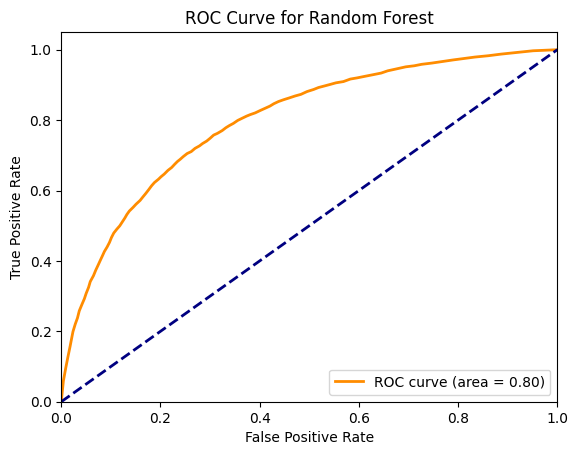

In [23]:
from sklearn.ensemble import RandomForestClassifier

# 1. Train the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_process, y_train)

# 2. Make predictions on the test set
y_pred = rf.predict(X_test_process)

# 3. Create a classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. Create a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 5. ROC Curve
y_test_binarized = label_binarize(y_test, classes=[0, 1])  # Binarize the output for ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binarized, rf.predict_proba(X_test_process)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Question 6
# Running Random Forest without PCA

# Change the X_train and X_test arrays into a DataFrame with the columns names
# 1. Create a new train test split of the data
# 2. Load the data into a DataFrame named df
# 3. change the sentiment column to 1 for positive and 0 for negative
# 4. Save the review column into a variable named X
# 5. Save the sentiment column into a variable named y
# 6. divide the data into training and testing sets using the train_test_split function
# 7. Use TfidfVectorizer with the stop_words='english' argument and 1000 as the max_features
# 8. Use the StandardScaler
# Important Note: Do not use PCA in this question

# 9. Create a dataframe with the feature the feature names as the columns
# Hint: you can use vectorizer.get_feature_names_out() to get the feature names
# 10. Print the last 10 rows of the dataframe, make sure that the columns names are words
# By using X_train.tail(10)

# Part 2
# Use the RandomForestClassifier from the sklearn library
# Train the model using the training set dataframe
# Create a classification report, confusion matrix, and roc curve

In [30]:
# 1. Create a new train test split of the data
X_train, X_test, y_train, y_test = load_data_and_train_test_split("IMDB Dataset.csv", test_size=0.2, random_state=42)   
df_train = pd.DataFrame({'review': list(X_train.review), 'sentiment': y_train})
df_test = pd.DataFrame({'review': list(X_test.review), 'sentiment': y_test})


,review
33553,I really liked this Summerslam due to the look...
9427,Not many television shows appeal to quite as m...
199,The film quickly gets to a major chase scene w...
12447,Jane Austen would definitely approve of this o...
39489,Expectations were somewhat high for me when I ...
...,...
28567,Although Casper van Dien and Michael Rooker ar...
25079,I liked this movie. I wasn't really sure what ...
18707,Yes non-Singaporean's can't see what's the big...
15200,"As far as films go, this is likable enough. En..."


In [62]:
from sklearn.ensemble import RandomForestClassifier
tf = TfidfVectorizer(max_features=1_000, stop_words='english')
# 8. Use the StandardScaler
scaler = StandardScaler()
X_train_tf = tf.fit_transform(df_train.review)
X_test_tf = tf.transform(df_test.review)


In [81]:
# import sklearn
# print(sklearn.__version__)


In [63]:
X_test_tf = tf.transform(df_test.review)
S = StandardScaler(with_mean=False)

X_test_scaled = S.fit_transform(X_test_tf.toarray())

In [64]:
X_train_scaled = scaler.fit_transform(X_train_tf.toarray())
feature_names = tf.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_scaled.tolist(), columns=feature_names)


In [75]:
# type(X_train_scaled)
X_train_df.tail(10)
# feature_names.shape
# X_train_df

,10,100,15,20,30,50,80,90,ability,able,...,wrong,wrote,yeah,year,years,yes,york,young,younger,zombie
39990,-0.337907,-0.115391,-0.126123,-0.1522,-0.140772,-0.120474,-0.12797,-0.126314,-0.117484,-0.199767,...,-0.229998,-0.132742,-0.123487,-0.251664,-0.356259,-0.207217,-0.134225,-0.296897,-0.124748,-0.090141
39991,2.536684,-0.115391,-0.126123,-0.1522,-0.140772,-0.120474,-0.12797,-0.126314,-0.117484,-0.199767,...,2.392363,-0.132742,-0.123487,2.041947,-0.356259,-0.207217,-0.134225,-0.296897,-0.124748,-0.090141
39992,-0.337907,-0.115391,-0.126123,-0.1522,-0.140772,-0.120474,-0.12797,-0.126314,-0.117484,-0.199767,...,1.692744,-0.132742,-0.123487,-0.251664,-0.356259,-0.207217,-0.134225,-0.296897,-0.124748,-0.090141
39993,-0.337907,-0.115391,-0.126123,-0.1522,-0.140772,-0.120474,-0.12797,-0.126314,-0.117484,-0.199767,...,-0.229998,-0.132742,-0.123487,-0.251664,-0.356259,-0.207217,-0.134225,-0.296897,-0.124748,-0.090141
39994,-0.337907,-0.115391,-0.126123,-0.1522,-0.140772,-0.120474,-0.12797,-0.126314,-0.117484,-0.199767,...,-0.229998,-0.132742,-0.123487,-0.251664,-0.356259,-0.207217,-0.134225,-0.296897,-0.124748,-0.090141
39995,-0.337907,-0.115391,-0.126123,-0.1522,-0.140772,-0.120474,-0.12797,-0.126314,14.071606,-0.199767,...,-0.229998,-0.132742,-0.123487,-0.251664,-0.356259,-0.207217,-0.134225,-0.296897,-0.124748,-0.090141
39996,-0.337907,-0.115391,-0.126123,-0.1522,-0.140772,-0.120474,-0.12797,-0.126314,-0.117484,-0.199767,...,-0.229998,-0.132742,-0.123487,-0.251664,-0.356259,-0.207217,-0.134225,-0.296897,-0.124748,-0.090141
39997,-0.337907,-0.115391,-0.126123,-0.1522,-0.140772,-0.120474,-0.12797,-0.126314,-0.117484,-0.199767,...,-0.229998,-0.132742,-0.123487,-0.251664,-0.356259,-0.207217,-0.134225,-0.296897,-0.124748,-0.090141
39998,-0.337907,-0.115391,-0.126123,-0.1522,-0.140772,-0.120474,-0.12797,-0.126314,-0.117484,-0.199767,...,-0.229998,-0.132742,-0.123487,-0.251664,-0.356259,-0.207217,-0.134225,-0.296897,-0.124748,-0.090141
39999,-0.337907,-0.115391,-0.126123,-0.1522,-0.140772,-0.120474,-0.12797,-0.126314,-0.117484,-0.199767,...,-0.229998,-0.132742,-0.123487,-0.251664,-0.356259,-0.207217,-0.134225,-0.296897,-0.124748,-0.090141


In [65]:
# 6. Train the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# 7. Make predictions on the test data
y_pred = rf.predict(X_test_scaled)

In [68]:
# X_train, X_test, y_train, y_test
len(y_pred) , len(y_test)
# X_test_scaled.shape

(10000, 10000)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83      4961
           1       0.87      0.76      0.81      5039

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000

Confusion Matrix:
 [[4392  569]
 [1225 3814]]


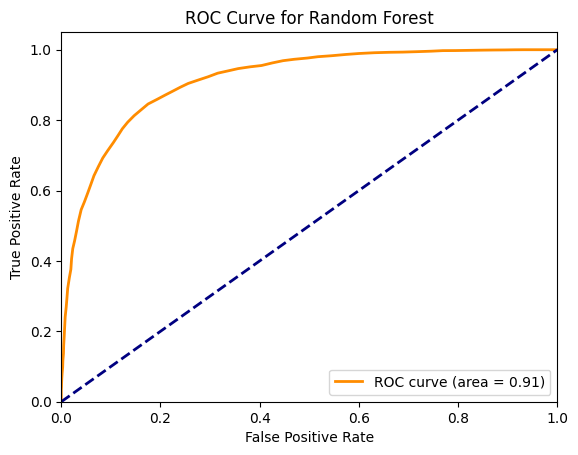

In [69]:

# 3. Generate Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. Generate Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 5. ROC Curve
# Binarize the test labels for ROC curve (needed for binary classification)
y_test_binarized = label_binarize(y_test, classes=[0, 1])

# Get the probability predictions for the ROC curve (predict_proba gives the probabilities)
y_score = rf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Compute FPR (False Positive Rate) and TPR (True Positive Rate) for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binarized, y_score)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Question 7
# Feature importance

# Use the RandomForestClassifier from the sklearn library
# Extract the feature importance from the model,
# you can use the model.feature_importances_ attribute of the RandomForestClassifier
# Extract the feature names from the dataframe
# you can use the model.feature_names_in_ attribute of the trained RandomForestClassifier
# Create a DataFrame with the feature names and their importance
# Plot a bar graph of the top 50 features by sorted by their importance in a descending order

In [83]:
# rf.feature_importances_
# rf.feature_names_in_ # THIS IS NOT RUNNING IN MY COMPUTER MAC ISSUE :(
feature_names = tf.get_feature_names_out()
df_feature_importance = pd.DataFrame({'feature': feature_names, 'importance': rf.feature_importances_})

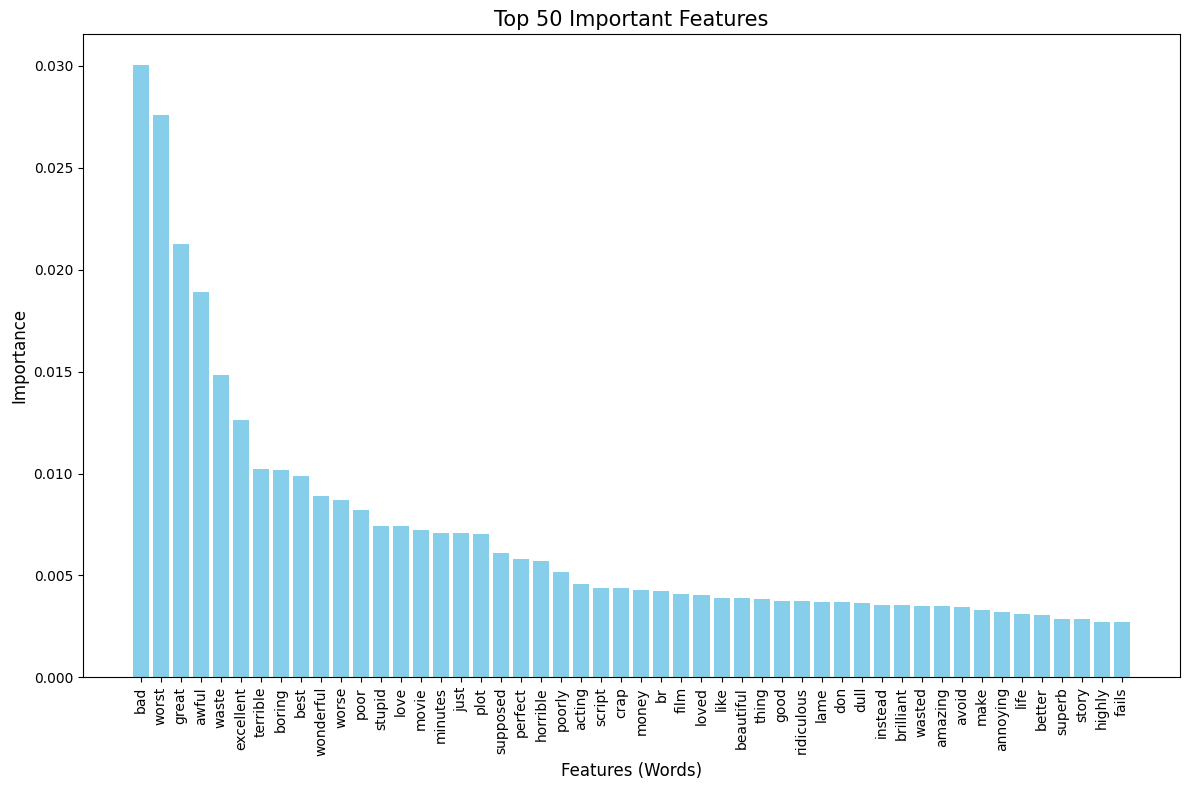

In [87]:
# Plot a bar graph of the top 50 features by sorted by their importance in a descending order
# Sort the DataFrame by importance in descending order and take the top 50 features
top_n = 50
top_features = df_feature_importance.sort_values(by='importance', ascending=False).head(top_n)

# Plot a bar graph with adjusted labels and layout
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
plt.bar(top_features['feature'], top_features['importance'], color='skyblue')
plt.xlabel('Features (Words)', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title(f'Top {top_n} Important Features', fontsize=15)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=10)

# Adjust layout so labels don't overlap
plt.tight_layout()

# Show the plot
plt.show()

<Axes: >

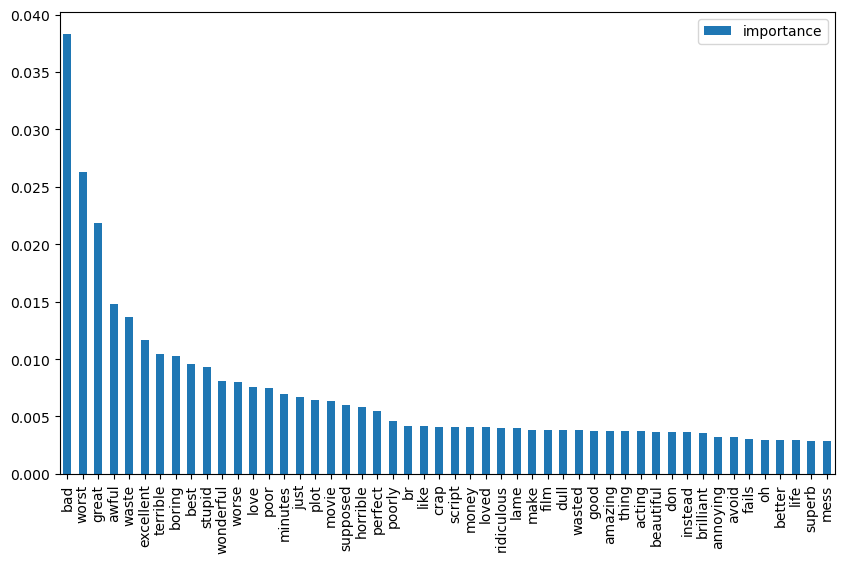

              precision    recall  f1-score   support

           0       0.83      0.69      0.75      4961
           1       0.74      0.86      0.79      5039

    accuracy                           0.78     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.78      0.77     10000

[[3422 1539]
 [ 705 4334]]


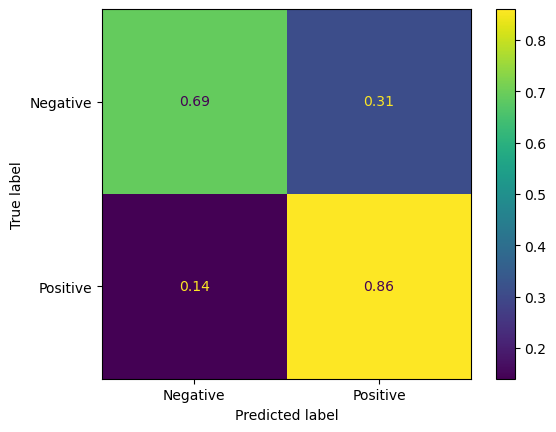

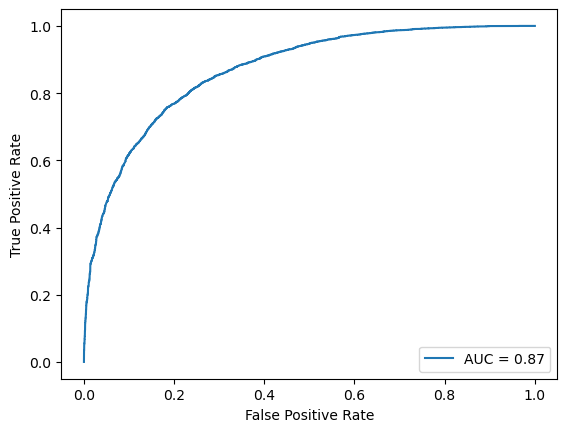

In [ ]:
# Question 8
# Changing max depth of the random forest

# 1. Train the RandomForestClassifier using the training set you created in question 6
# 2. Change the max_depth to 3
# 3. Create a classification report, confusion matrix, and roc curve
# 4. Extract the tree stracture from the model by using model.estimators_
# 5. Plot the tree structure by using the plot_tree function from the sklearn library
# For these trees [0, 32, 42]

# How would you explain the difference in features? 


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.80      4961
           1       0.86      0.67      0.75      5039

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.77     10000
weighted avg       0.79      0.78      0.77     10000

Confusion Matrix:
 [[4394  567]
 [1669 3370]]


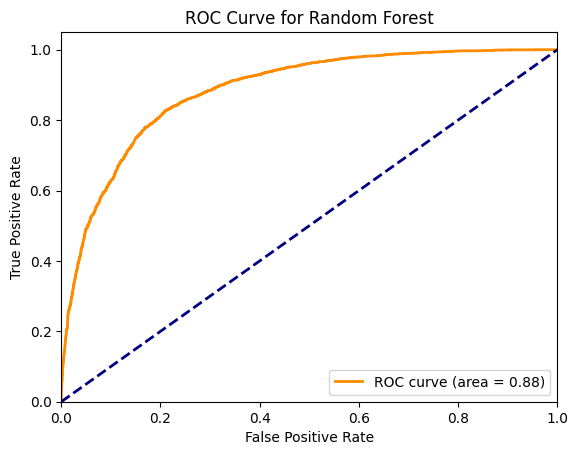

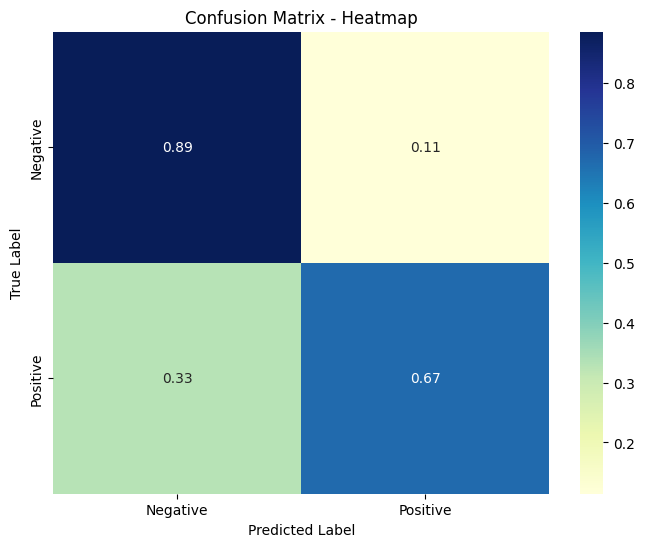

In [93]:
rf = RandomForestClassifier(random_state=42, max_depth=3)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. Generate Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 5. ROC Curve
# Binarize the test labels for ROC curve (needed for binary classification)
y_test_binarized = label_binarize(y_test, classes=[0, 1])

# Get the probability predictions for the ROC curve (predict_proba gives the probabilities)
y_score = rf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Compute FPR (False Positive Rate) and TPR (True Positive Rate) for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binarized, y_score)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


import numpy as np
import seaborn as sns
# 1. Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# 3. Create the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# 4. Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Heatmap')
plt.show()


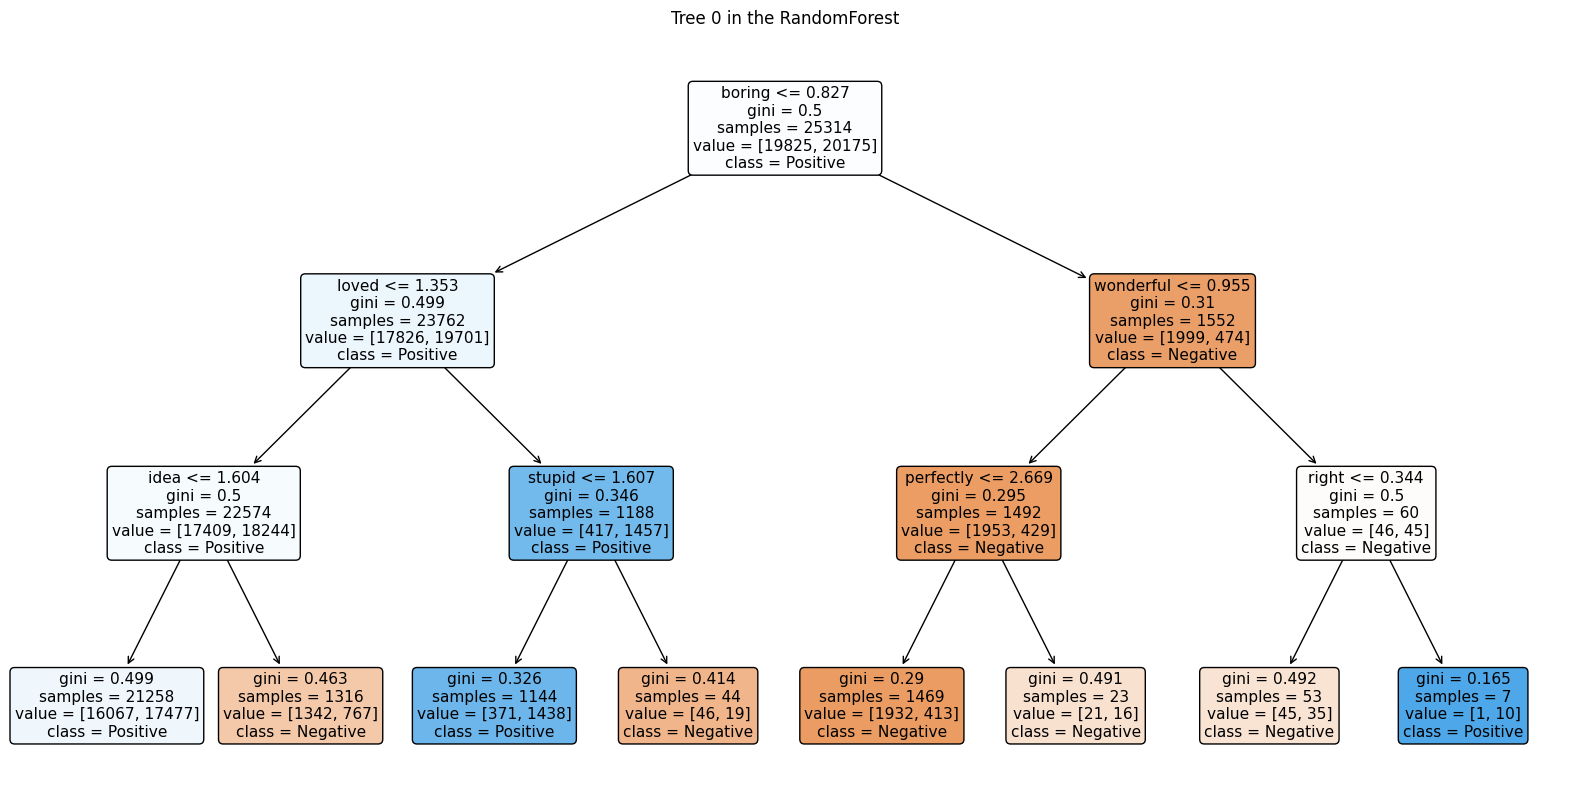

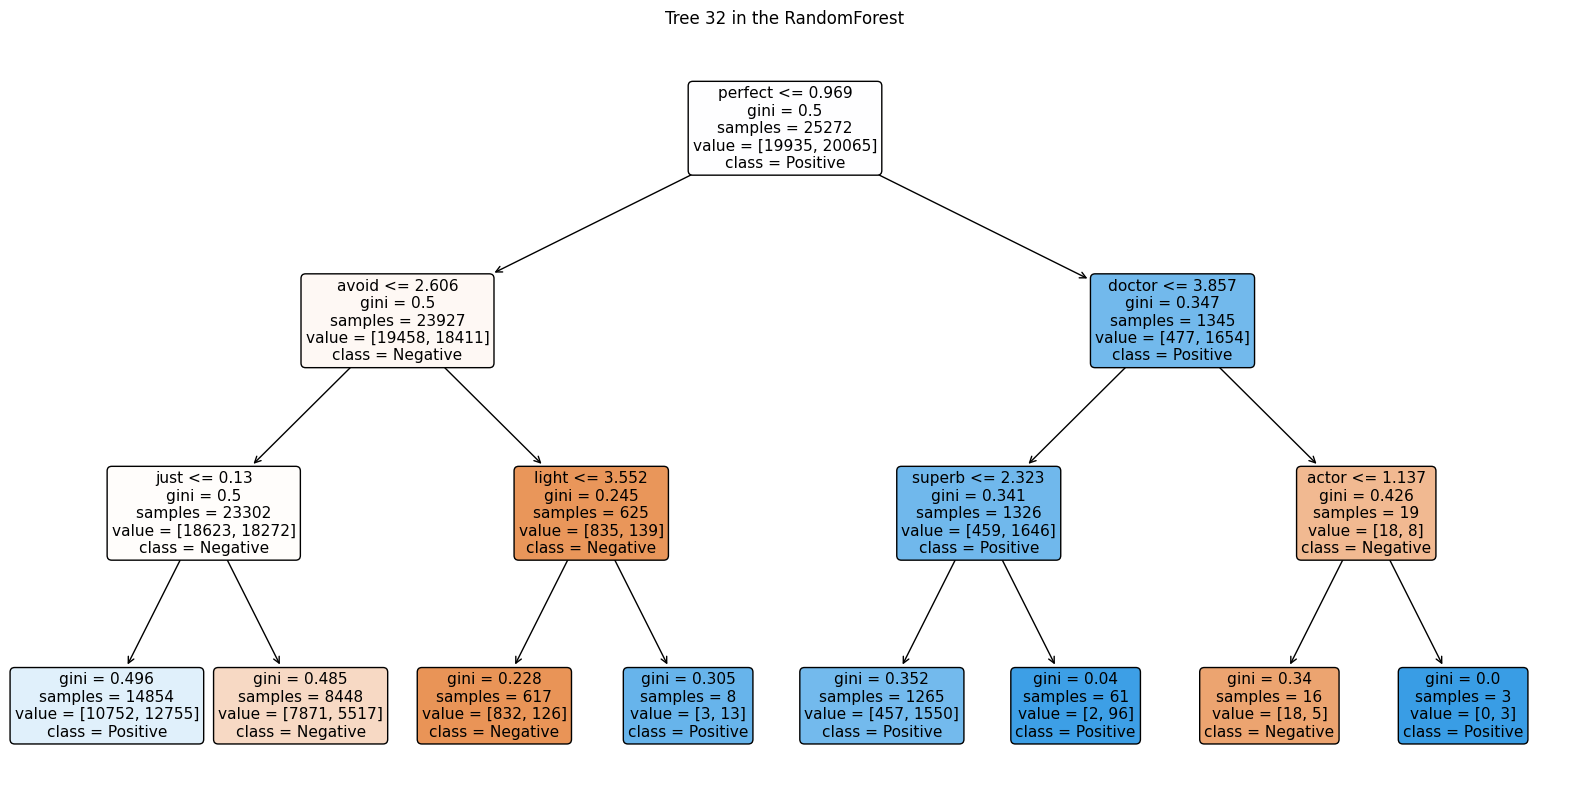

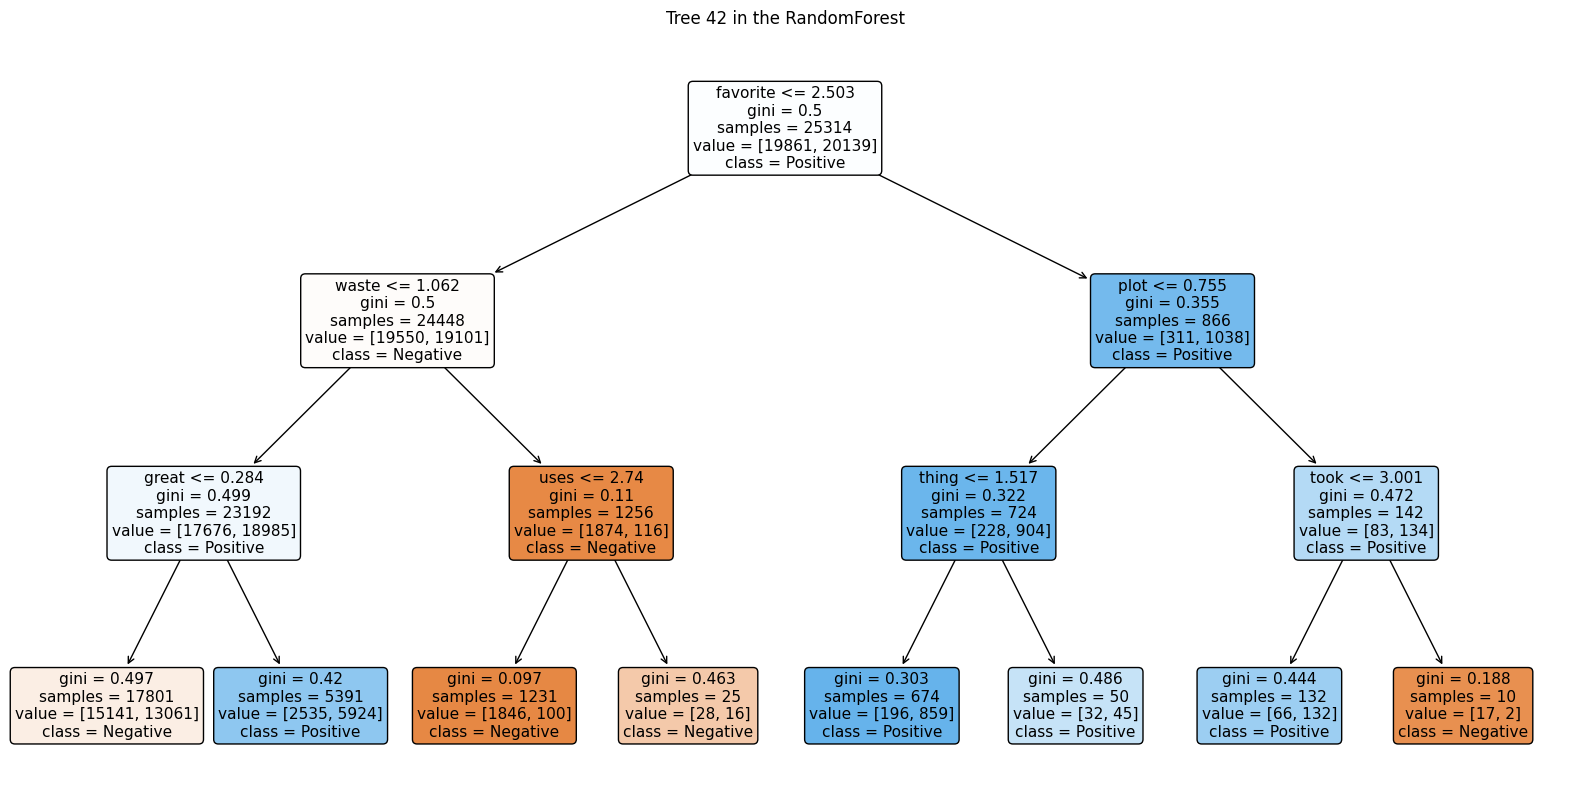

In [94]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming rf is your trained RandomForestClassifier

# 1. Access the trees in the RandomForest
trees_to_plot = [0, 32, 42]  # List of the tree indices you want to plot

# 2. Loop through and plot the trees
for tree_idx in trees_to_plot:
    plt.figure(figsize=(20, 10))  # Set figure size for better readability
    tree = rf.estimators_[tree_idx]  # Access the decision tree at index tree_idx
    plot_tree(tree, filled=True, feature_names=tf.get_feature_names_out(), class_names=['Negative', 'Positive'], rounded=True)
    plt.title(f'Tree {tree_idx} in the RandomForest')
    plt.show()

'''

In your RandomForest model, 
each decision tree splits based on different words (features) that it finds most useful for classifying the sentiment as positive or negative. 
Here's how you can interpret the differences in features:

'''



<Figure size 2000x2000 with 0 Axes>

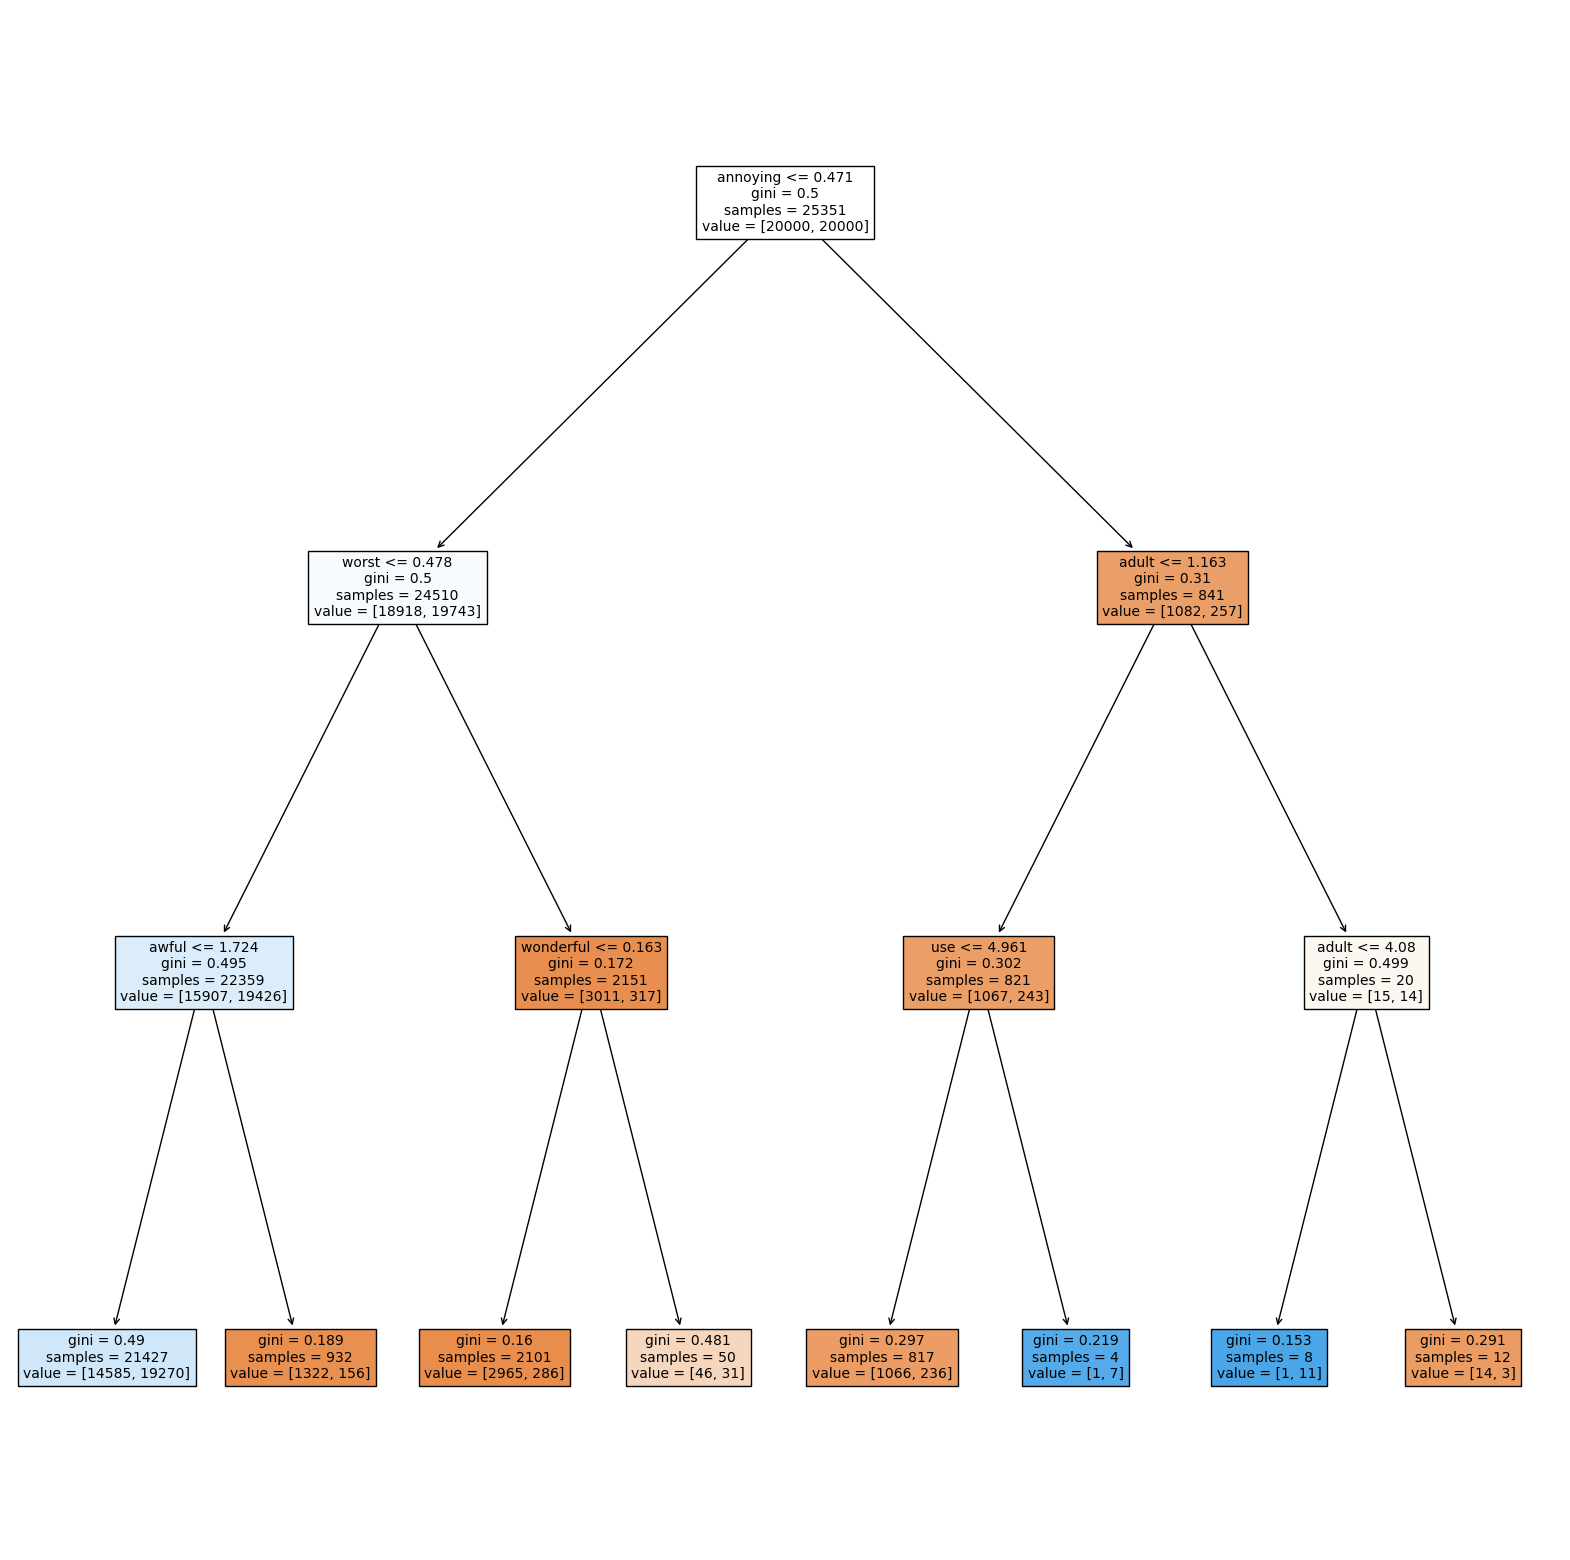

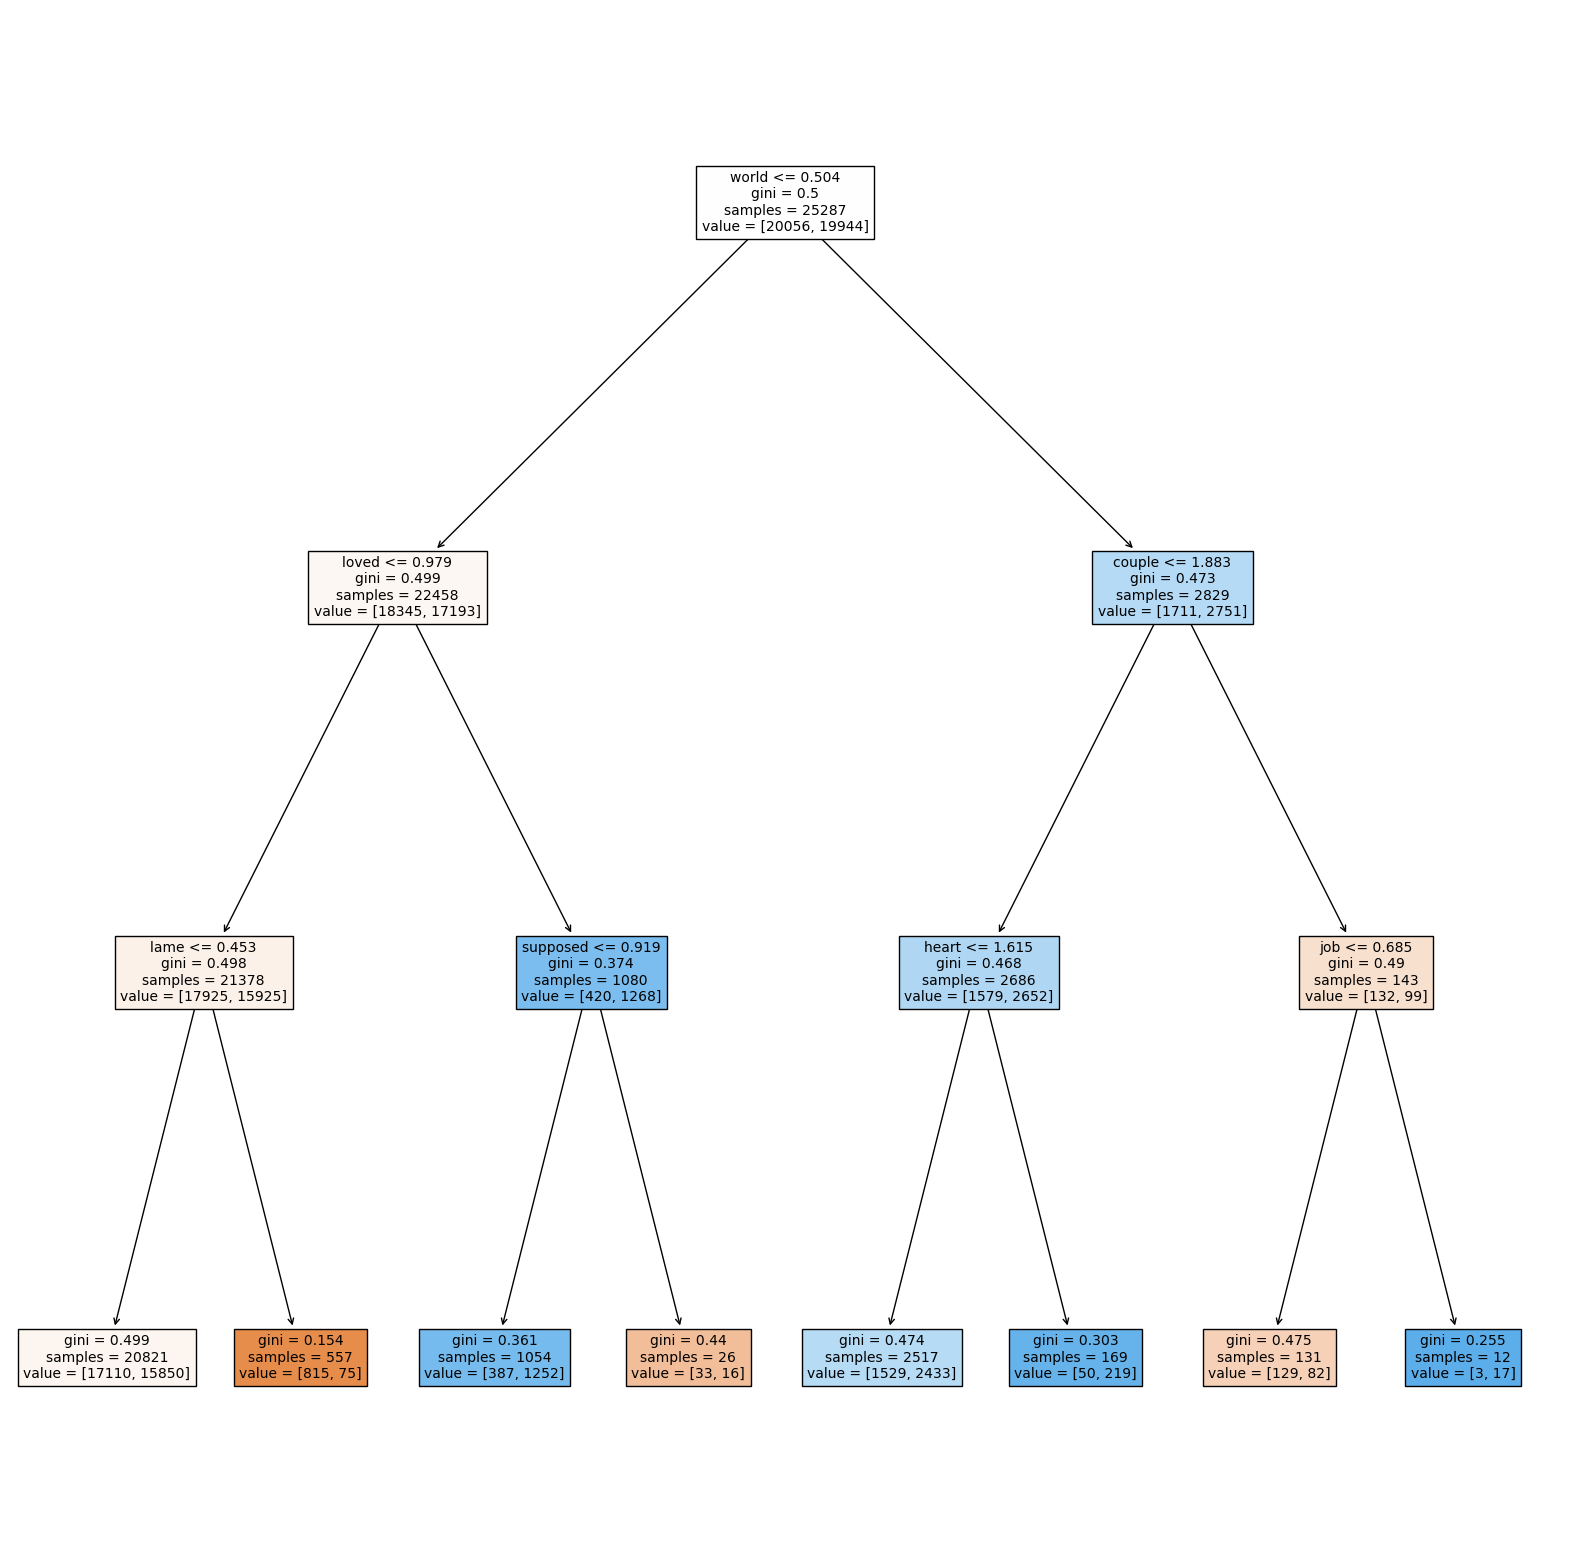

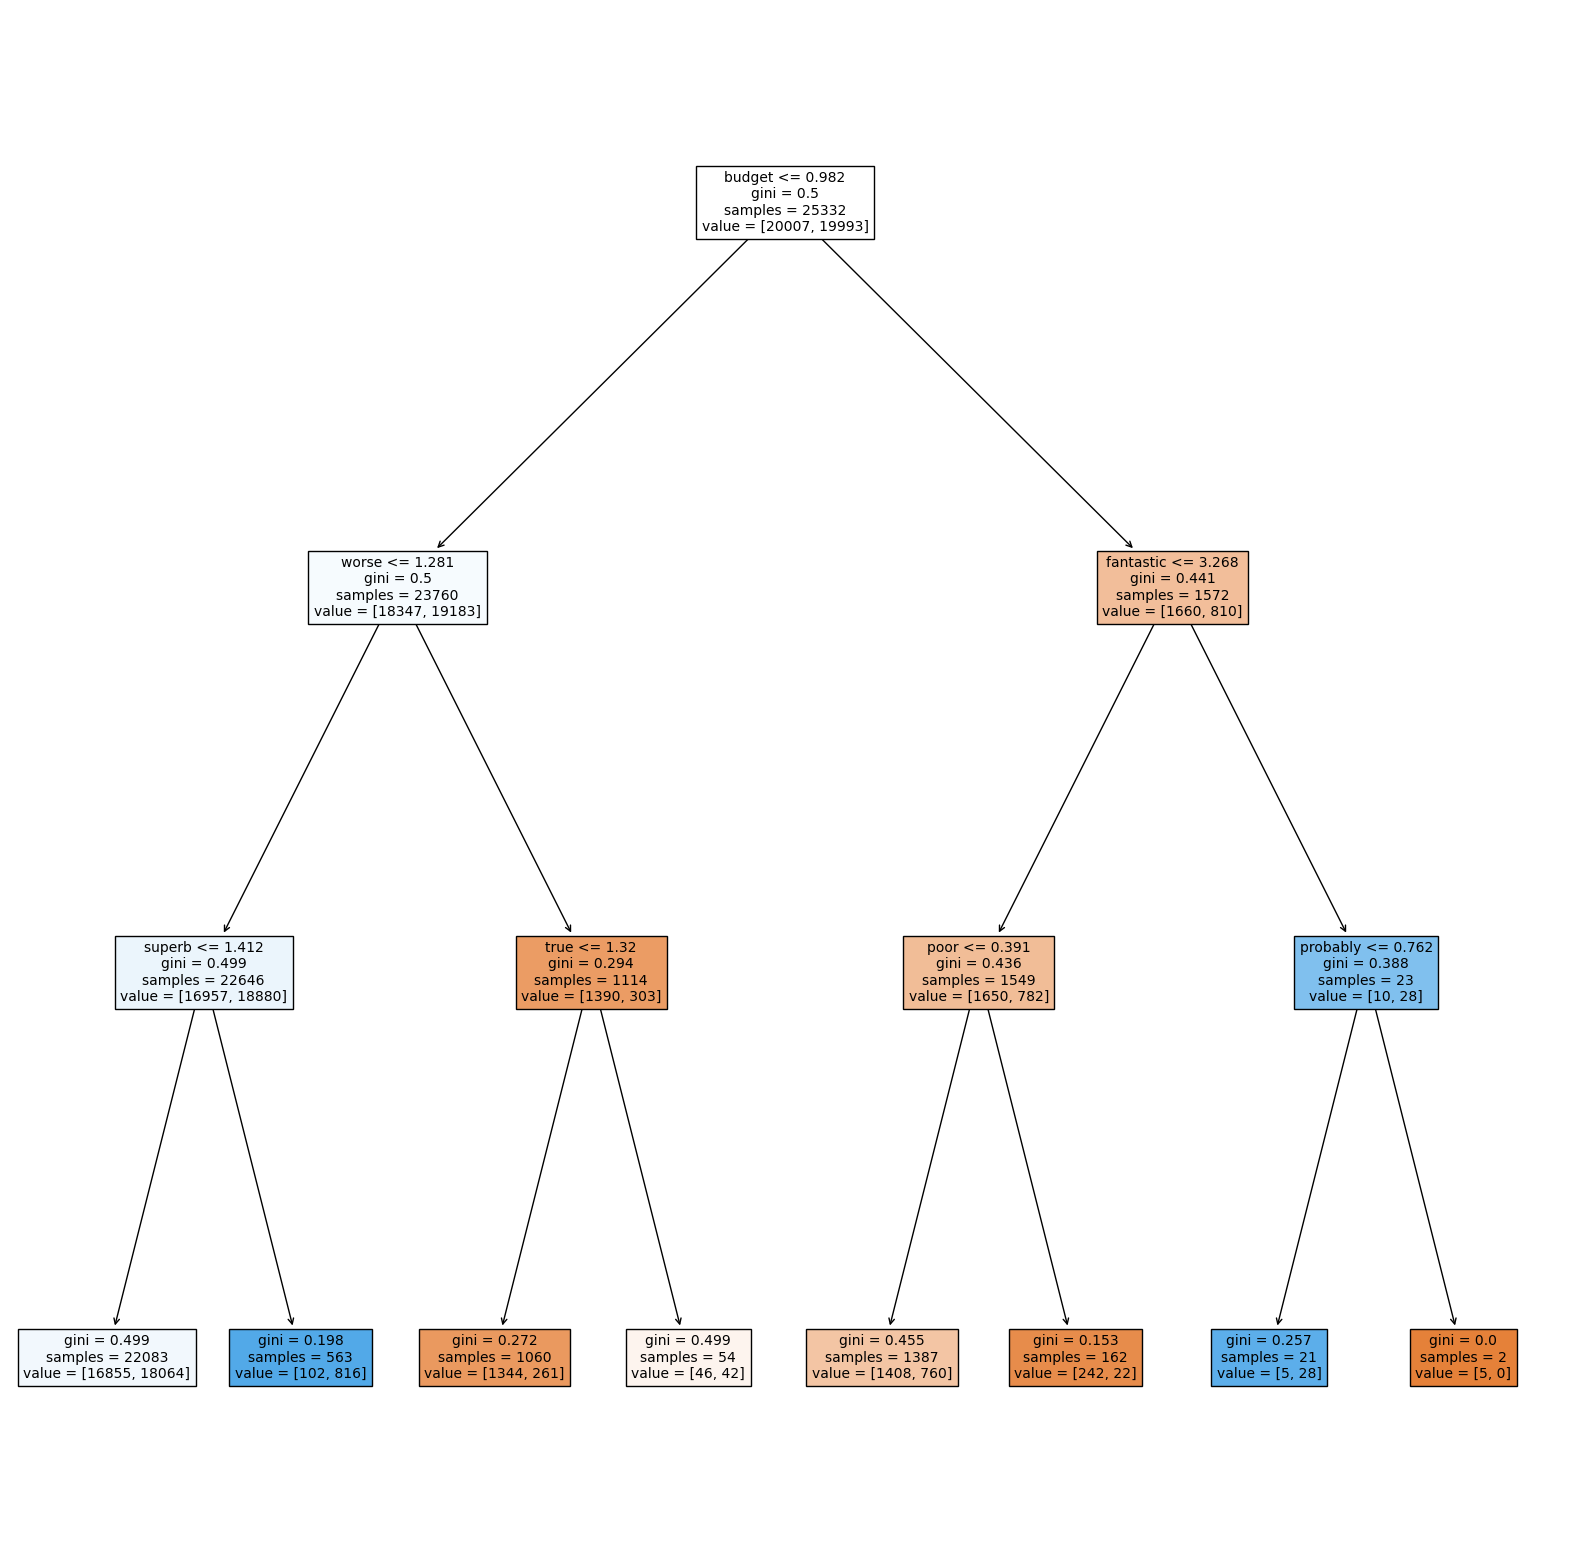

# Chapter 3: Classification Vs Clustering

In [97]:
# Question 9
# Using Kmeans to cluster the data and evaluation effectiveness of the clustering

# 1. Use the functions load_data_and_train_test_split and preprocess_text_to_features to load the data and preprocess it
# 2. Use the KMeans from the sklearn library sklearn.cluster to cluster the data into 2 clusters
# 3. Use the provided function map_clusters_to_labels to map the clusters to the labels
# 4. Calculate the accuracy of the clustering by comparing the predicted labels to the true labels
# 5. Calculate the confusion matrix, classification report, and roc curve

def map_clusters_to_labels(clusters, true_labels):
    from scipy.stats import mode
    labels = np.zeros_like(clusters)
    for i in range(2):
        mask = (clusters == i)
        labels[mask] = mode(true_labels[mask])[0]
    return labels


Clustering Accuracy: 0.61
Confusion Matrix:
 [[3612 1349]
 [2503 2536]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.73      0.65      4961
           1       0.65      0.50      0.57      5039

    accuracy                           0.61     10000
   macro avg       0.62      0.62      0.61     10000
weighted avg       0.62      0.61      0.61     10000



/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_70738/542380503.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(true_labels[mask])[0]


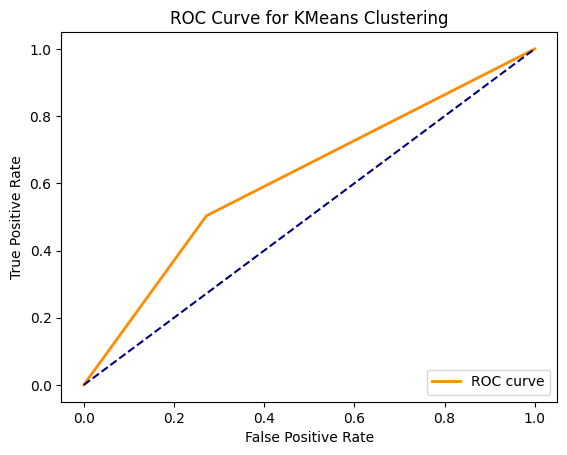

In [98]:
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = load_data_and_train_test_split("IMDB Dataset.csv", test_size=0.2, random_state=42)   
X_train_process, X_test_process = preprocess_text_to_features(X_train.review, X_test.review, max_features=10_000)
# 2. Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_test_process)  # Cluster the test data

# Apply the mapping
mapped_labels = map_clusters_to_labels(clusters, y_test)


# 4. Calculate accuracy
accuracy = accuracy_score(y_test, mapped_labels)
print(f"Clustering Accuracy: {accuracy:.2f}")

# 5. Calculate confusion matrix, classification report, and roc curve
conf_matrix = confusion_matrix(y_test, mapped_labels)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, mapped_labels)
print("Classification Report:\n", class_report)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, mapped_labels)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KMeans Clustering')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Question 10
# Use TSNE to visualize the data

# 1. Run The functions load_data_and_train_test_split 
# 2. Use TfidfVectorizer with the stop_words='english' argument and 100 as the max_features
# 2. Sample a subset of the random subsset of the data with the size of 1000
# 3. Use the TSNE from the sklearn library
# 4. Create a scatter plot of the data
# 5. Use the true labels to color the data points
# 6. Run the same process on a max_features of 10000, and compare the two plots

# What are the differences between the two plots (100, 10,000)?
# how would you explain them?

## explain
max_features=100: Less distinct clusters, potential overlap, because fewer words (features) are used.
max_features=10,000: More distinct clusters, better separation, because more words are considered in the TF-IDF vectorization.



/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


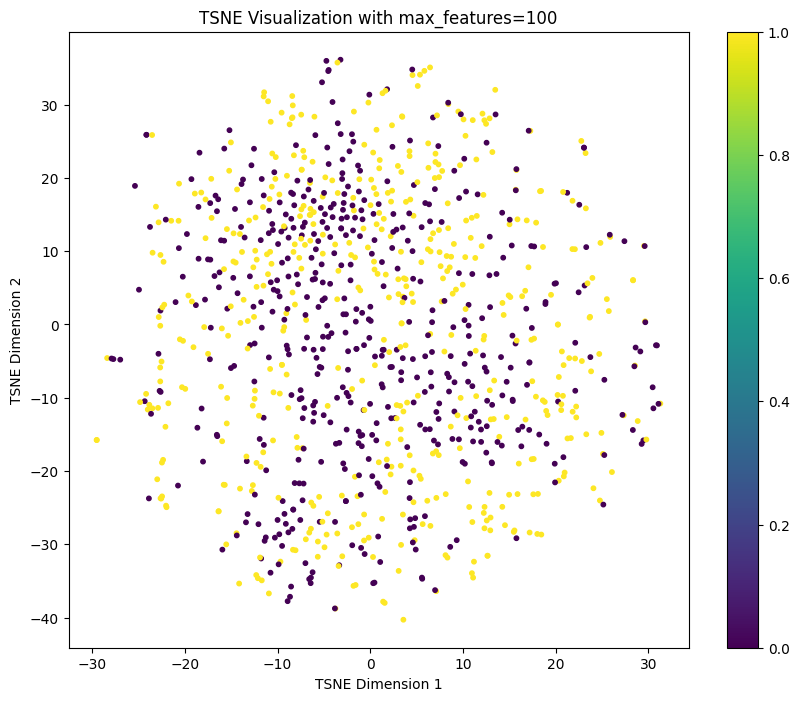

/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


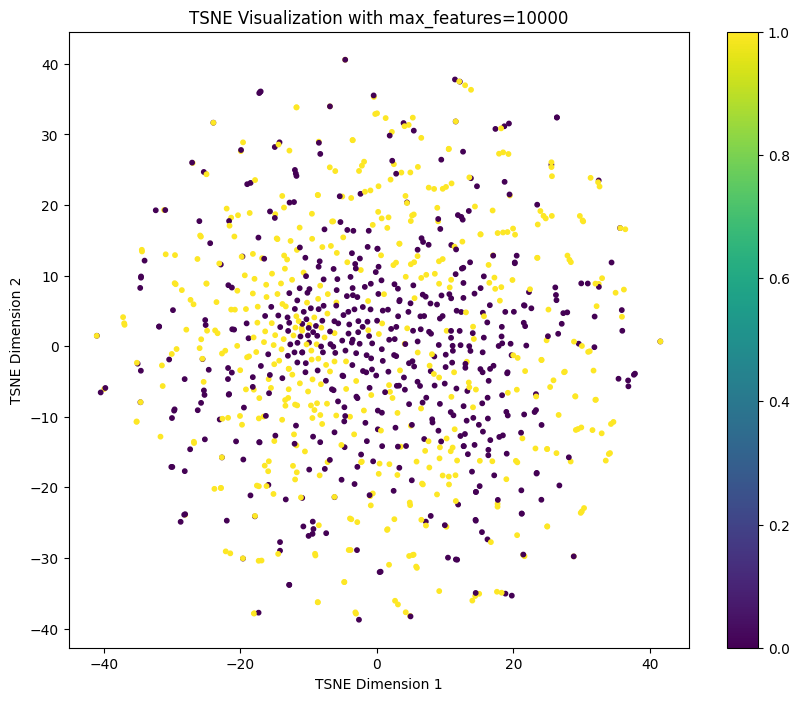

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.utils import resample

# Assuming the functions load_data_and_train_test_split and preprocess_text_to_features are already defined

# 1. Load and split the data
X_train, X_test, y_train, y_test = load_data_and_train_test_split("IMDB Dataset.csv", test_size=0.2, random_state=42)

# Function to run Tfidf and TSNE visualization
def run_tsne_and_plot(X_train, y_train, max_features, sample_size=1000):
    # 2. Use TfidfVectorizer to vectorize the text data
    vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    
    # 3. Randomly sample 1000 data points for TSNE
    X_train_sample, y_train_sample = resample(X_train_tfidf, y_train, n_samples=sample_size, random_state=42)
    
    # 4. Run TSNE to reduce the dimensionality to 2D
    tsne = TSNE(n_components=2, random_state=42)
    X_train_tsne = tsne.fit_transform(X_train_sample.toarray())  # TSNE requires a dense array, so use .toarray()

    # 5. Scatter plot of the TSNE result, coloring by the true labels
    plt.figure(figsize=(10, 8))
    plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train_sample, cmap='viridis', s=10)
    plt.colorbar()
    plt.title(f'TSNE Visualization with max_features={max_features}')
    plt.xlabel('TSNE Dimension 1')
    plt.ylabel('TSNE Dimension 2')
    plt.show()

# Run TSNE with max_features=100
run_tsne_and_plot(X_train.review, y_train, max_features=100)

# Run TSNE with max_features=10000
run_tsne_and_plot(X_train.review, y_train, max_features=10000)

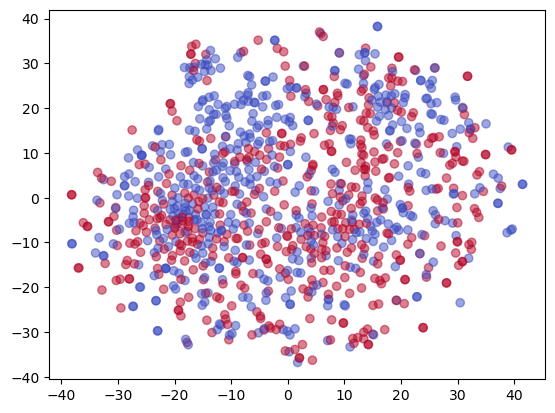